<a href="https://colab.research.google.com/github/Ibtasam-98/machine-learning-algorithms/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression


In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

print("Libraries imported successfully!")

Libraries imported successfully!


# Loading Dataset and Exploration

We'll load the Diabetes dataset, which is a built-in dataset in scikit-learn, and take a quick look at its structure.



In [3]:
diabetes = load_diabetes(as_frame=True)

# Separate the features (input variables, X) from the target (output variable, y)
X = diabetes.data
y = diabetes.target

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

print("\n--- First 5 rows of Features (X) ---")
print(X.head()) # Display the first 5 rows of the feature DataFrame
print("\n--- First 5 rows of Target (y) ---")
print(y.head()) # Display the first 5 values of the target Series


Shape of X (features): (442, 10)
Shape of y (target): (442,)

--- First 5 rows of Features (X) ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

--- First 5 rows of Target (y) ---
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


#Visualize one feature


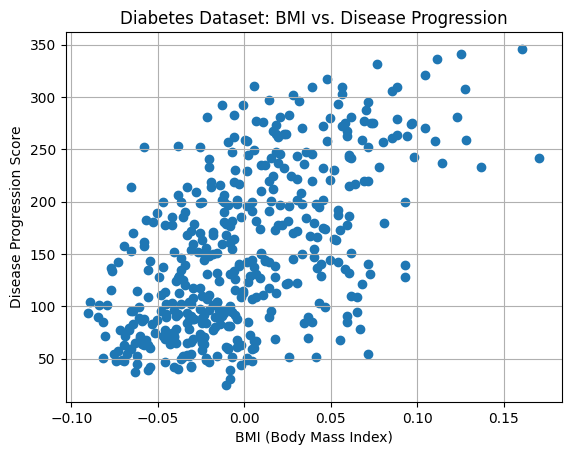

In [4]:
plt.scatter(X['bmi'], y)
plt.title("Diabetes Dataset: BMI vs. Disease Progression")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression Score")
plt.grid(True)
plt.show()

**Explanation**

* load_diabetes() fetches the dataset.
* X holds the input features (like age, BMI, blood pressure, etc.)
y holds the target variable (a quantitative measure of disease progression).
* X.shape and y.shape show the number of samples and features.
* X.head() and y.head() print a preview of the data.
* The scatter plot helps visualize the relationship between one feature and the target, which is good practice for initial data understanding.


#Train and Split Data


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("\n--- Training and Test Data Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



--- Training and Test Data Shapes ---
X_train shape: (331, 10)
y_train shape: (331,)
X_test shape: (111, 10)
y_test shape: (111,)


**Explanation**

* train_test_split randomly divides your data.
* test_size=0.2 means 20% of the data will be used for testing.
* Random_state is like a seed for randomness; it makes sure your split is reproducible.

# Initialize and Train the Lasso Regression Model


In [8]:
print("\n--- Lasso Regression (L1 Regularization) ---")

# Define the regularization strength (alpha)
# 'alpha' controls how much the model penalizes large coefficients.
# Higher alpha = stronger penalty = more coefficients pushed to zero.
# For the Diabetes dataset, 0.1 is a common starting point.
lasso_alpha = 0.1

# Create a Lasso regression model instance
# 'random_state' for reproducibility if using different solvers or for consistency
lasso_model = Lasso(alpha=lasso_alpha, random_state=42)

# Train the model using the training data
# The model learns the optimal coefficients for each feature
lasso_model.fit(X_train, y_train)

print(f"Lasso model training complete with alpha={lasso_alpha}!")



--- Lasso Regression (L1 Regularization) ---
Lasso model training complete with alpha=0.1!


**Explanation:**

* lasso_alpha: This is the crucial hyperparameter for Lasso. You can experiment with different values (e.g., 0.01, 0.5, 1.0, 0.001) to see how it affects the model.

* Lasso(...): Creates the model object.

* lasso_model.fit(...): This is where the learning happens. The algorithm adjusts the coefficients of each feature to minimize the errors, while also applying the L1 penalty to keep coefficients small or zero.

# Inspect Model Coefficients


In [ ]:
# Display the learned coefficients for all features
print("\n--- Lasso Coefficients ---")

# Get the names of the features from the original DataFrame
feature_names = X.columns
# Create a pandas Series to easily view feature names alongside their coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=feature_names)
print(lasso_coefficients)

# Display the intercept (the value of y when all X features are zero)
print(f"\nIntercept: {lasso_model.intercept_:.2f}")

# Count how many coefficients were driven to zero by Lasso
zero_coeffs = (lasso_coefficients == 0).sum()
print(f"Number of coefficients driven to zero by Lasso: {zero_coeffs} out of {len(feature_names)}")


# Make Predictions on Test Data

In [9]:
# Use the trained Lasso model to make predictions on the test set features (X_test)
y_pred_lasso = lasso_model.predict(x_test)

print("\nPredictions on test data generated.")
print("First 5 actual test values:", y_test.values[:5]) # Display actual values
print("First 5 predicted values:", y_pred_lasso[:5]) # Display predicted values


Predictions on test data generated.
First 5 actual test values: [219.  70. 202. 230. 111.]
First 5 predicted values: [147.65108726 178.20955911 149.39155172 270.7512827  128.68718886]


# Evaluate Model Performance


In [ ]:
# Mean Absolute Error (MAE): Average absolute difference between actual and predicted values.
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
# Mean Squared Error (MSE): Average squared difference. Penalizes larger errors more.
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# Root Mean Squared Error (RMSE): Square root of MSE. In the same units as the target variable.
rmse_lasso = np.sqrt(mse_lasso)
# R-squared (R2): Proportion of variance in the dependent variable predictable from the independent variables.
# 1 means perfect prediction, 0 means no better than predicting the mean.
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\n--- Lasso Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R2 Score: {r2_lasso:.2f}")


**Explanation:**

* These metrics quantify how well the model's predictions match the actual values.

* MAE: Easy to understand, average error magnitude.

* MSE/RMSE: More sensitive to large errors. RMSE is often preferred as it's in the original units of the target.

* R2 Score: Provides a percentage of how much variance in the target variable can be explained by the model.

# Visualize Actual vs. Predicted Values

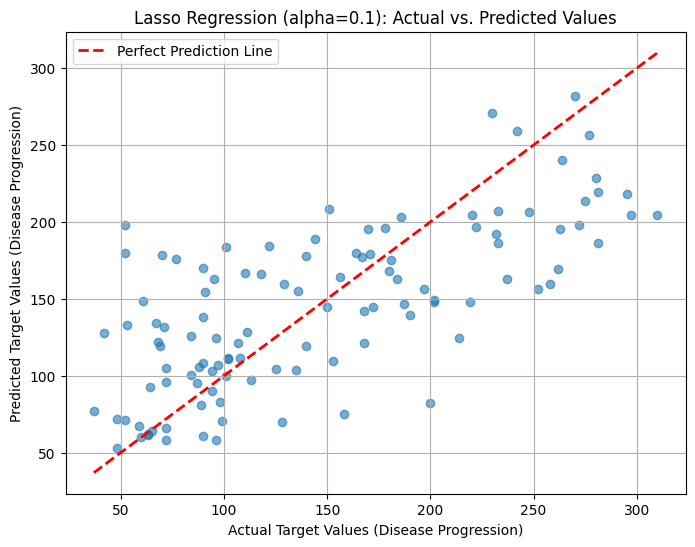


Finished running Lasso Regression on Diabetes dataset.


In [10]:
# --- Visualization of Actual vs. Predicted Values ---
plt.figure(figsize=(8, 6))
# Plot actual values on X-axis and predicted values on Y-axis
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
# Plot a diagonal line (y=x). Points on this line mean perfect predictions.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title(f'Lasso Regression (alpha={lasso_alpha}): Actual vs. Predicted Values')
plt.xlabel('Actual Target Values (Disease Progression)')
plt.ylabel('Predicted Target Values (Disease Progression)')
plt.grid(True)
plt.legend()
plt.show()

print("\nFinished running Lasso Regression on Diabetes dataset.")

**Explanation:**

* The scatter plot shows how close your predicted values (y_pred_lasso) are to the actual true values (y_test).

* The red dashed line represents a scenario where Predicted = Actual. The closer your scattered points are to this line, the better your model's predictions.